# WeatherPy

---


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the code above

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | palmer
Processing Record 3 of Set 1 | bar-sur-aube
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | lubango
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | gweru
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | ba
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | oltinko'l
Processing Record 15 of Set 1 | malvan
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | mossel bay
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | kilindoni
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | blackmans bay


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.18,95,85,11.95,TF,1699459533
1,palmer,42.1584,-72.3287,278.89,47,20,5.66,US,1699459249
2,bar-sur-aube,48.2500,4.5833,284.50,77,37,5.72,FR,1699459534
3,invercargill,-46.4000,168.3500,281.49,93,97,0.89,NZ,1699459535
4,ushuaia,-54.8000,-68.3000,282.94,46,20,3.58,AR,1699459535


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.18,95,85,11.95,TF,1699459533
1,palmer,42.1584,-72.3287,278.89,47,20,5.66,US,1699459249
2,bar-sur-aube,48.2500,4.5833,284.50,77,37,5.72,FR,1699459534
3,invercargill,-46.4000,168.3500,281.49,93,97,0.89,NZ,1699459535
4,ushuaia,-54.8000,-68.3000,282.94,46,20,3.58,AR,1699459535


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

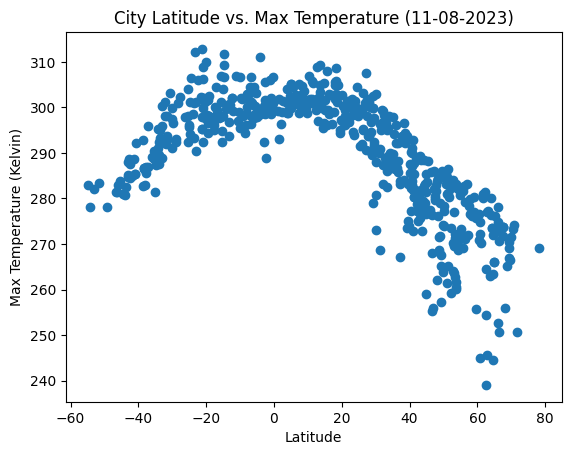

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (11-08-2023)')
plt.ylabel('Max Temperature (Kelvin)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

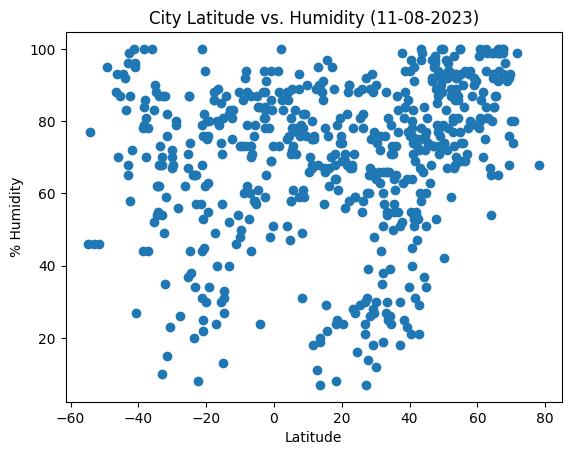

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (11-08-2023)')
plt.ylabel('% Humidity')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

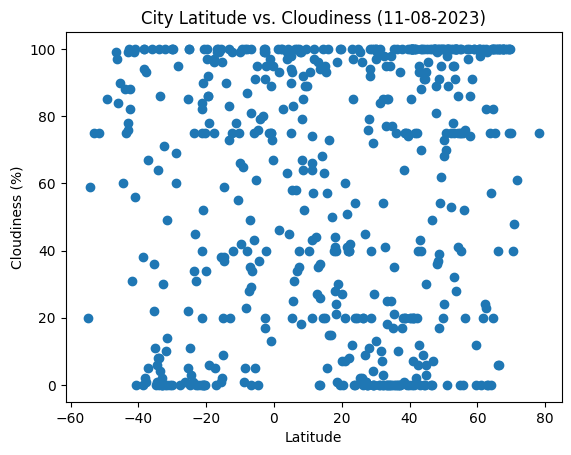

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (11-08-2023)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

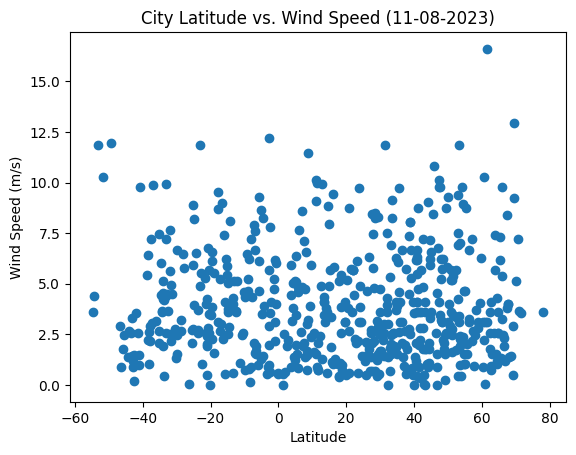

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (11-08-2023)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,palmer,42.1584,-72.3287,278.89,47,20,5.66,US,1699459249
2,bar-sur-aube,48.2500,4.5833,284.50,77,37,5.72,FR,1699459534
5,ilulissat,69.2167,-51.1000,269.16,68,75,0.51,GL,1699459536
10,klyuchi,52.2667,79.1667,273.54,59,53,3.35,RU,1699459540
11,yellowknife,62.4560,-114.3525,264.49,94,100,2.57,CA,1699459323


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,278.18,95,85,11.95,TF,1699459533
3,invercargill,-46.4000,168.3500,281.49,93,97,0.89,NZ,1699459535
4,ushuaia,-54.8000,-68.3000,282.94,46,20,3.58,AR,1699459535
6,adamstown,-25.0660,-130.1015,295.63,87,100,8.90,PN,1699459537
7,lubango,-14.9172,13.4925,304.07,13,20,3.60,AO,1699459538


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.85


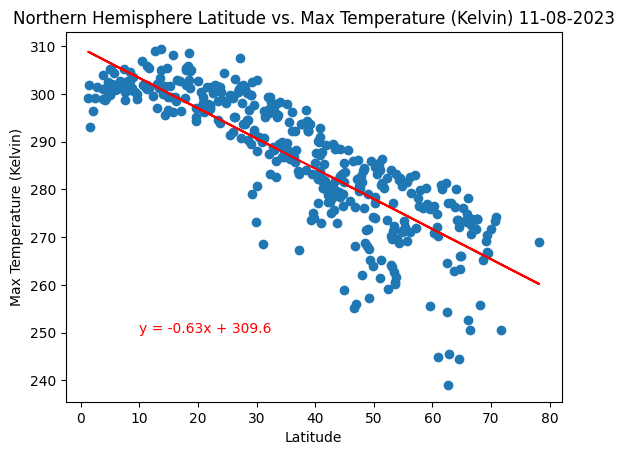

In [37]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (10, 250), fontsize=10,color="red")
plt.title('Northern Hemisphere Latitude vs. Max Temperature (Kelvin) 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
plt.show()

The r-value is: 0.73


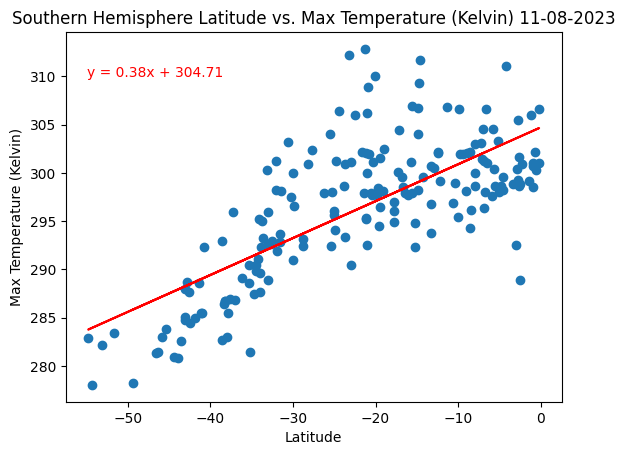

In [39]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-55, 310), fontsize=10,color="red")
plt.title('Southern Hemisphere Latitude vs. Max Temperature (Kelvin) 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3


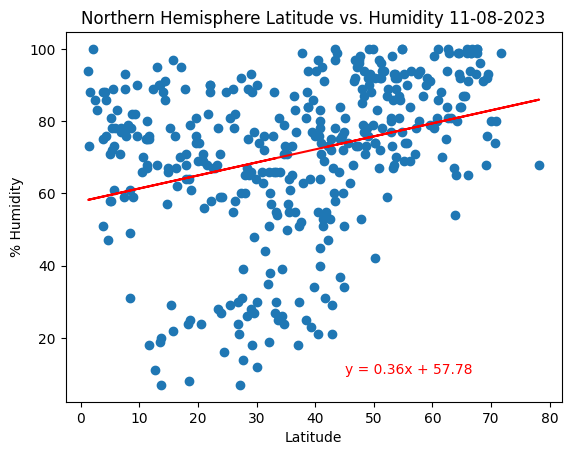

In [40]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (45, 10), fontsize=10,color="red")
plt.title('Northern Hemisphere Latitude vs. Humidity 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.show()

The r-value is: -0.02


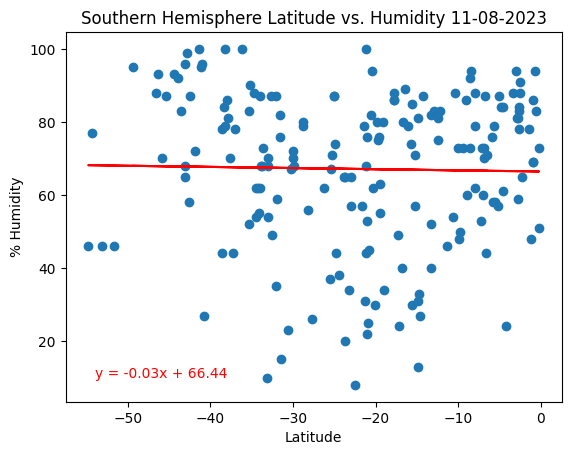

In [43]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-54, 10), fontsize=10,color="red")
plt.title('Southern Hemisphere Latitude vs. Humidity 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14


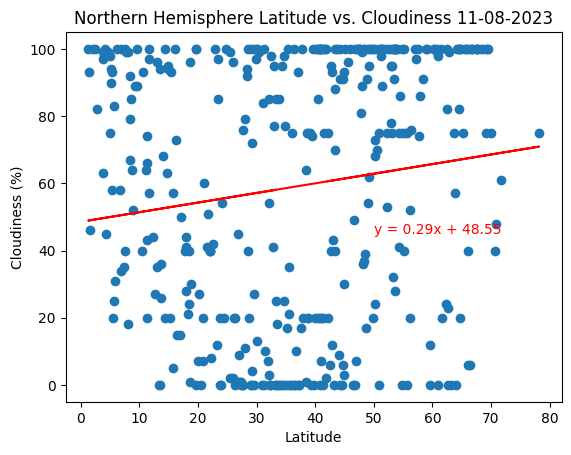

In [44]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (50, 45), fontsize=10,color="red")
plt.title('Northern Hemisphere Latitude vs. Cloudiness 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-value is: 0.09


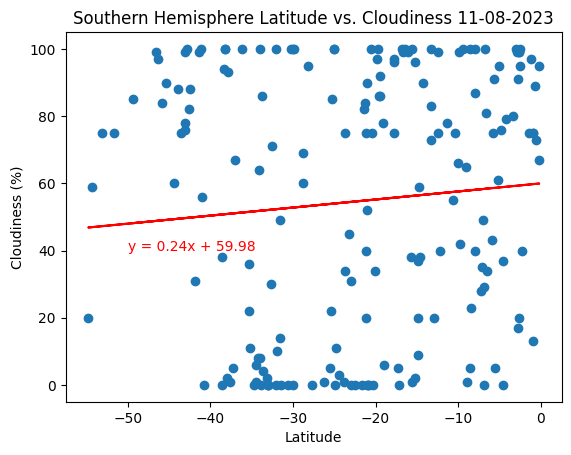

In [46]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-50, 40), fontsize=10,color="red")
plt.title('Southern Hemisphere Latitude vs. Cloudiness 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07


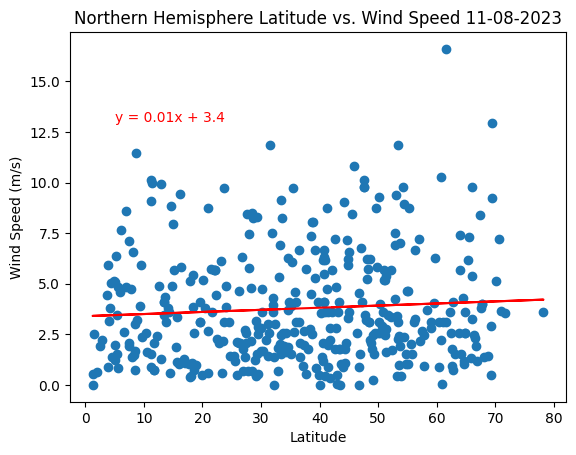

In [47]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (5, 13), fontsize=10,color="red")
plt.title('Northern Hemisphere Latitude vs. Wind Speed 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

The r-value is: -0.02


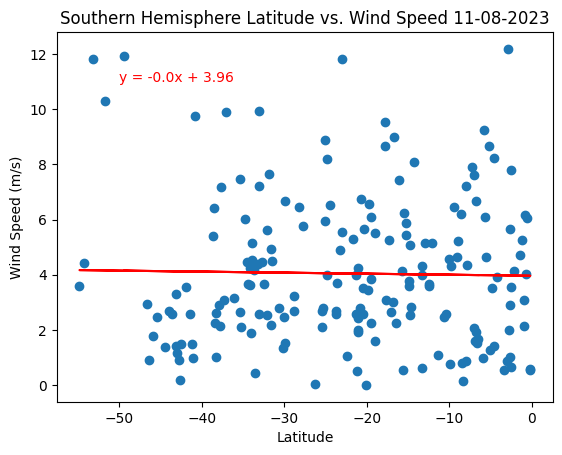

In [49]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, (-50, 11), fontsize=10,color="red")
plt.title('Southern Hemisphere Latitude vs. Wind Speed 11-08-2023')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE